In [1]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
draft_data = pd.read_csv("NBADraft.csv")

In [7]:
draft_data.head()

,Pk,School,G_college,GS,MP_college,FG,FGA,FG%_college,2P,2PA,...,TRB_college,AST_college,STL,BLK,TOV,PF,PTS_college,SOS,name,lottery
0,1,Kentucky,37,37,34.8,5.5,11.8,0.461,4.5,8.8,...,4.3,6.5,1.8,0.5,4.0,1.9,16.6,6.82,john wall,True
1,2,Ohio State,101,94,32.8,5.3,10.6,0.502,4.8,9.1,...,6.8,4.1,1.6,0.7,3.5,2.7,15.0,7.86,evan turner,True
2,3,Georgia Tech,36,35,27.5,5.0,8.1,0.611,5.0,8.1,...,8.4,1.0,0.9,2.1,2.5,2.6,12.4,9.02,derrick favors,True
3,5,Kentucky,38,37,23.5,5.4,9.7,0.558,5.4,9.6,...,9.8,1.0,1.0,1.8,2.1,3.2,15.1,6.82,demarcus cousins,True
4,7,Georgetown,65,65,32.6,5.3,9.8,0.543,5.2,9.3,...,8.2,3.2,1.5,1.5,2.9,2.5,14.5,9.26,greg monroe,True


In [128]:
draft_data.columns

Index(['Rk', 'Pk', 'School', 'G_college', 'GS', 'MP_college', 'FG', 'FGA',
       'FG%_college', '2P', '2PA', '2P%', '3P', '3PA', '3P%_college', 'FT',
       'FTA', 'FT%_college', 'ORB', 'DRB', 'TRB_college', 'AST_college', 'STL',
       'BLK', 'TOV', 'PF', 'PTS_college', 'SOS', 'name', 'lottery'],
      dtype='object')

In [8]:
len(draft_data)

415

In [9]:
draft_data.drop(["name","lottery"],axis=1,inplace=True)

In [10]:
draft_data.isna().sum()

Pk              0
School          0
G_college       0
GS              0
MP_college      0
FG              0
FGA             0
FG%_college     0
2P              0
2PA             0
2P%             0
3P              0
3PA             0
3P%_college    22
FT              0
FTA             0
FT%_college     0
ORB             0
DRB             0
TRB_college     0
AST_college     0
STL             0
BLK             0
TOV             0
PF              0
PTS_college     0
SOS             0
dtype: int64

In [11]:
draft_data.dropna(inplace=True)

In [12]:
draft_data.describe()

,Pk,G_college,GS,MP_college,FG,FGA,FG%_college,2P,2PA,2P%,...,ORB,DRB,TRB_college,AST_college,STL,BLK,TOV,PF,PTS_college,SOS
count,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.00000,393.000000,393.000000,...,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000
mean,28.974555,81.875318,64.643766,28.463104,4.595674,9.706361,0.478646,3.50229,6.721374,0.520654,...,1.493893,3.961323,5.450891,2.246056,1.023410,0.774300,1.940967,2.173028,13.086768,7.220967
std,17.194694,39.879311,33.876431,4.422506,1.190355,2.610318,0.059706,1.21442,2.164156,0.058541,...,0.871290,1.382057,2.072563,1.510116,0.446485,0.702057,0.659140,0.454103,3.495679,3.190615
min,1.000000,3.000000,0.000000,13.200000,1.300000,2.400000,0.356000,0.60000,1.200000,0.374000,...,0.100000,1.500000,1.900000,0.200000,0.200000,0.000000,0.600000,1.000000,3.400000,-5.410000
25%,14.000000,38.000000,35.000000,25.900000,3.700000,7.900000,0.438000,2.60000,5.100000,0.483000,...,0.800000,2.900000,3.800000,1.200000,0.700000,0.300000,1.500000,1.900000,10.400000,6.650000
50%,28.000000,75.000000,65.000000,29.100000,4.600000,9.700000,0.465000,3.30000,6.500000,0.513000,...,1.300000,3.700000,5.100000,1.800000,0.900000,0.500000,1.900000,2.200000,13.100000,7.840000
75%,44.000000,117.000000,89.000000,31.800000,5.300000,11.400000,0.514000,4.30000,8.200000,0.553000,...,2.100000,4.800000,6.800000,2.900000,1.300000,1.100000,2.300000,2.500000,15.500000,9.160000
max,60.000000,152.000000,147.000000,36.500000,9.000000,19.300000,0.769000,8.20000,14.300000,0.800000,...,4.300000,8.600000,11.800000,8.700000,2.900000,5.400000,5.200000,4.100000,27.400000,12.750000


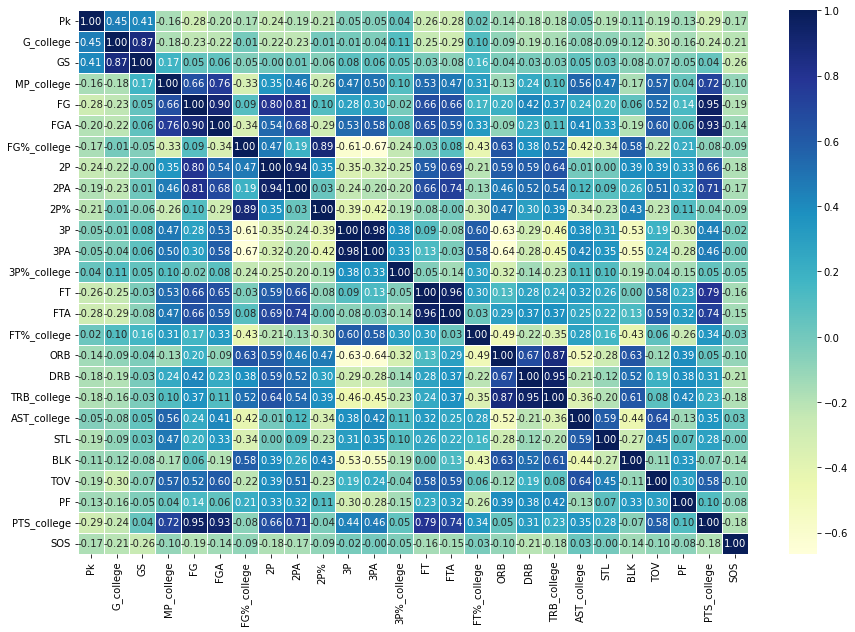

In [13]:
corr_matrix = draft_data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

In [14]:
draft_data_top8=draft_data[["GS","MP_college","2P%","3P","FTA","ORB","STL","SOS","Pk"]]

In [15]:
len(draft_data_top8)

393

In [16]:
#model with all variables 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
np.random.seed(2899)
X = draft_data.drop("Pk",axis=1)
y = draft_data["Pk"]

cats = ["School"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 cats)],
                                 remainder="passthrough")
trans_X = transformer.fit_transform(X)
trans_X

X_train, X_test,y_train,y_test = train_test_split(trans_X,y,test_size=0.2)

model=RandomForestRegressor().fit(X_train,y_train)
rfa = model.score(X_test,y_test)
rfa

0.32160827601744146

In [17]:
#ridge regession
from sklearn.linear_model import Ridge
np.random.seed(2899)
X = draft_data.drop("Pk",axis=1)
y = draft_data["Pk"]

cats = ["School"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 cats)],
                                 remainder="passthrough")
trans_X = transformer.fit_transform(X)
trans_X

X_train, X_test,y_train,y_test = train_test_split(trans_X,y,test_size=0.2)

ridge=Ridge().fit(X_train,y_train)
ra = ridge.score(X_test,y_test)
ra

0.229236395146448

In [18]:
#lasso regression 
from sklearn.linear_model import Lasso

lasso=Lasso().fit(X_train,y_train)
la = lasso.score(X_test,y_test)
la

0.2883184186274942

In [19]:
#model with top 8 variables 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
np.random.seed(2899)
X = draft_data_top8.drop("Pk",axis=1)
y = draft_data_top8["Pk"]

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model=RandomForestRegressor().fit(X_train,y_train)
rfa8 = model.score(X_test,y_test)
rfa8

0.23803425626819297

In [20]:
ridge=Ridge().fit(X_train,y_train)
ra8 = ridge.score(X_test,y_test)
ra8

0.3195286463939768

In [21]:
from sklearn.linear_model import Lasso

lasso=Lasso().fit(X_train,y_train)
la8 = lasso.score(X_test,y_test)
la8

0.2500740946318293

/Users/jackpiccione/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


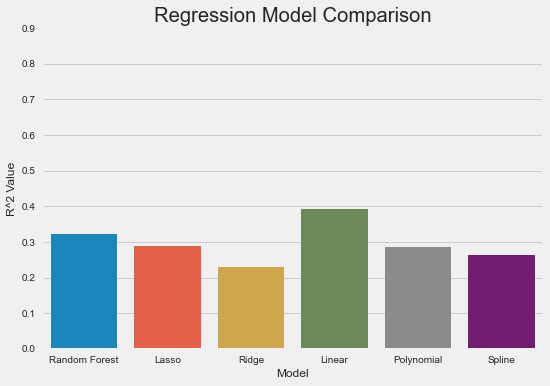

In [193]:
plt.style.use('fivethirtyeight')
models=["Random Forest","Lasso","Ridge","Linear","Polynomial","Spline"]
r2 = [rfa,la,ra,.393,.286,.262]
fig=sns.barplot(models, r2)
fig.set_xlabel("Model", fontsize = 12)
fig.set_ylabel("R^2 Value", fontsize = 12)
fig.set_title("Regression Model Comparison")
fig.set_yticks(np.arange(0, 1, .1))
plt.show()

In [26]:
#read in data to train lottery model
draft_dataLOT = pd.read_csv("NBAdraft.csv")

In [29]:
draft_dataLOT.columns

Index(['School', 'G_college', 'GS', 'MP_college', 'FG', 'FGA', 'FG%_college',
       '2P', '2PA', '2P%', '3P', '3PA', '3P%_college', 'FT', 'FTA',
       'FT%_college', 'ORB', 'DRB', 'TRB_college', 'AST_college', 'STL', 'BLK',
       'TOV', 'PF', 'PTS_college', 'SOS', 'lottery'],
      dtype='object')

In [28]:
draft_dataLOT.drop(["Pk","name"],inplace=True,axis=1)

In [32]:
draft_dataLOT.drop("School",inplace=True,axis=1)

In [36]:
draft_dataLOT.dropna(inplace=True)

In [47]:
draft_dataLOT.columns

Index(['G_college', 'GS', 'MP_college', 'FG', 'FGA', 'FG%_college', '2P',
       '2PA', '2P%', '3P', '3PA', '3P%_college', 'FT', 'FTA', 'FT%_college',
       'ORB', 'DRB', 'TRB_college', 'AST_college', 'STL', 'BLK', 'TOV', 'PF',
       'PTS_college', 'SOS', 'lottery'],
      dtype='object')

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
np.random.seed(2899)
X = draft_dataLOT.drop("lottery",axis=1)
y = draft_dataLOT["lottery"]

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

rfc=RandomForestClassifier().fit(X_train,y_train)

In [81]:
rfc.score(X_test, y_test)

0.7341772151898734

In [160]:
prospects = pd.read_csv("prospects.csv")

In [49]:
prospects.head()

,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SOS,name
0,32,31,26.9,5.3,8.8,0.607,4.0,5.5,0.737,1.3,...,8.1,9.9,1.9,0.8,3.7,1.9,2.7,14.1,4.50,chet-holmgren
1,39,39,33.0,6.3,13.2,0.478,5.2,9.8,0.525,1.1,...,6.1,7.8,3.2,1.1,0.9,2.4,1.9,17.2,7.26,paolo-banchero
2,29,29,25.3,4.9,8.1,0.597,4.9,8.1,0.600,0.0,...,5.2,8.1,1.3,0.8,2.1,2.2,2.7,12.0,7.86,jalen-duren
3,34,34,32.0,3.2,8.4,0.384,1.4,3.4,0.426,1.8,...,3.2,4.0,1.4,0.7,0.2,1.5,1.7,10.1,11.02,caleb-houstan
4,11,10,28.5,4.1,11.9,0.344,2.5,6.1,0.418,1.5,...,4.9,5.8,1.5,0.8,0.8,2.1,1.5,12.1,-6.32,patrick-baldwinjr


In [68]:
chl=prospects.loc[[0]].values.flatten().tolist()
name=chl.pop()
achl=[chl]
ynew = rfc.predict(achl)
ynew,name

(array([ True]), 'chet-holmgren')

In [161]:
prospects.dropna(inplace=True)

In [162]:
prospects=prospects.reset_index(drop=True)

In [163]:
df_list5=[]
df=[]
for i in range(len(prospects)):
    plist=prospects.loc[[i]].values.flatten().tolist()
    name=plist.pop()
    parray=[plist]
    ynew = rfc.predict_proba(parray)
    ylist=ynew.tolist()
    ylist=ylist[0]
    #df["name"] = plist.pop() #add player name to dataframe
    #df["lottery_prob"] = ylist.pop() 
    df.append(name)
    df.append(ylist.pop())
    #df_list5.append(df)
    print(ynew,name)

[[0.34 0.66]] chet-holmgren
[[0.25 0.75]] paolo-banchero
[[0.51 0.49]] jalen-duren
[[0.66 0.34]] caleb-houstan
[[0.49 0.51]] patrick-baldwinjr
[[0.53 0.47]] jaden-ivey
[[0.79 0.21]] peyton-watson
[[0.56 0.44]] tyty-washingtonjr
[[0.45 0.55]] kennedy-chandler
[[0.47 0.53]] jd-davison
[[0.96 0.04]] allen-flanigan
[[0.89 0.11]] johnny-juzang
[[0.56 0.44]] marcus-bagley
[[0.76 0.24]] julian-champagnie
[[0.68 0.32]] gabe-brown
[[0.63 0.37]] mark-williams
[[0.76 0.24]] matthew-mayer
[[0.64 0.36]] jabari-walker
[[0.5 0.5]] keegan-murray
[[0.64 0.36]] max-abmas
[[0.81 0.19]] caleb-love
[[0.8 0.2]] ochai-agbaji
[[0.88 0.12]] collin-gillespie
[[0.54 0.46]] kendall-brown
[[0.71 0.29]] matthew-cleveland
[[0.6 0.4]] walker-kessler
[[0.93 0.07]] taevion-kinsey
[[0.98 0.02]] jamaree-bouyea
[[0.55 0.45]] drew-timme
[[0.94 0.06]] josiah-jordan-james
[[0.69 0.31]] trayce-jackson-davis
[[0.91 0.09]] dalen-terry
[[0.5 0.5]] malaki-branham
[[0.83 0.17]] jalen-wilson
[[0.94 0.06]] ron-harperjr
[[0.34 0.66]]

In [164]:
def every_second_element(values):
    second_values = []

    for index in range(1, len(values), 2):
        second_values.append(values[index])

    return second_values 

In [165]:
lot_prob_list=every_second_element(df)

In [166]:
res = [i for i in df if i not in lot_prob_list]

In [167]:
len(res)

69

In [168]:
len(lot_prob_list)

69

In [169]:
d = {'Prospect':res,'Lottery_Probability':lot_prob_list}

In [170]:
lottery = pd.DataFrame(d)

In [171]:
lottery.sort_values(by=['Lottery_Probability'],ascending=False).head(14)

,Prospect,Lottery_Probability
1,paolo-banchero,0.75
0,chet-holmgren,0.66
35,bryce-mcgowens,0.66
68,jabari-smith,0.65
8,kennedy-chandler,0.55
9,jd-davison,0.53
4,patrick-baldwinjr,0.51
32,malaki-branham,0.50
18,keegan-murray,0.50
2,jalen-duren,0.49
